# Single inflation
## Background Dynamics
We consider a model consisting of one scalar fields, say, φ, whose dynamics is governed by the following action:
$$
S(\phi)=\int d^4x\sqrt{-g}\left[\frac{M_\text{P}}{2}R-\frac{1}{2}(\partial\phi)^2-V(\phi)\right]\,,
$$
where $\phi$ is a cononical scalar field, and we consider the following potential:
$$
V=\frac{1}{2}m^2\phi^2\,.
$$
We work with the spactially flat Friedmann-Robertson-Walker (FRW) universe by the line-element
$$
ds^2=-dt^2+a^2(t)dx^2\,,
$$
where $a(t)$ is the scale factor and $t$ is the cosmic time. In this background, the equation of motion (EOM) is given by (Euler-Lagrange equation):

$$\ddot \phi=-3H\dot\phi-V_{,\phi}=-3H\dot\phi-m^2\phi\,,$$
where $H$ is the Hubble parameter. The dynamics of the scale factor is described by the following Friedmann equations:

$$H^2=\frac{1}{3M_\text{P}}\left[\frac{1}{2}\dot\phi^2+V\right]\,,$$

$$\dot H=-\frac{\dot\phi^2}{2M_\text{P}}\,,$$

where $M_\text{P}$ is Plank mass. At this point, we can solve equations and obtain trajectory. But in order to allow e-folds and scale factor to appear naturally, we need to redefine these dimensionless variables, which will facilitate our subsequent processing of the power spectrum.


$$T=t\cdot M_\text{P} \qquad x=\frac{\phi}{M_\text{P}}$$

$$y=\frac{\dot\phi}{M_\text{P}^2}\qquad  z=\frac{H}{M_\text{P}}\qquad a=a\,,$$

EOM and sacle factor Friedmann Equations become:

$$\frac{dx}{dT}=y$$

$$\frac{dy}{dT}=-3zy-\frac{V_\phi}{M_\text{P}^2}=-3zy-\frac{m^2 x}{M_\text{P}^2}$$

$$\frac{dz}{dT}=-\frac{1}{2}y^2 M_\text{P}^2$$

$$\frac{da}{dT}=az$$

and $V_\phi=m^2\phi/M_\text{P}$, see code for details.

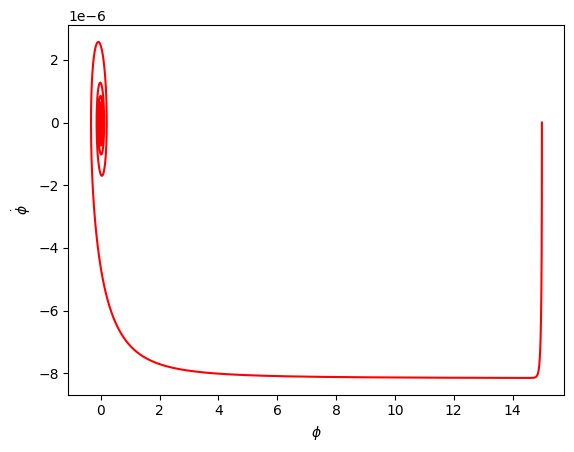

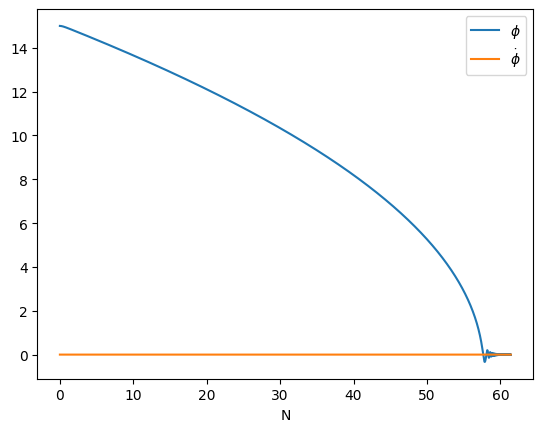

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

m_p = 1 
m=1e-5*m_p

xi = 15 # initial field value
yi = 0 # initial field velocity
zi = np.sqrt(yi**2/6*m_p**5 + m**2*xi**2/(6*m_p**3)) # initial value of hubble parameter
ai = 1 # initial value of scale factor

def sys(var, T):
    [x, y, z, a] = var

    # Note that all derivatives are taken wrt the scaled, dimenstionless cosmic time T

    dxdT = y
    dydT = -3*z*y - m**2*x/m_p**2 
    dzdT = -0.5*y**2 *m_p**2
    dadT = a*z
    
    return [dxdT, dydT, dzdT, dadT]

 
T = np.linspace(0, 100000000, 100000)


# invoking the ODE solver
# solve_ivp used in below, reserve this as a comparison
sol = odeint(sys, [xi,yi,zi,ai], T, rtol=3e-14, atol=2e-35, mxstep=900000000)
x, y, z, a= np.transpose(sol)
phi, phi_t, H = x, y, z

m2phi2=m**2*phi**2
N = np.log(a/ai) # number of e-folds of expansion elapsed


plt.plot(phi,phi_t, 'r')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\dot\phi$')
plt.show()

plt.plot(N, phi, label=r'$\phi$')
plt.plot(N, phi_t, label=r'$\dot\phi $')
plt.legend()
plt.xlabel('N')
plt.show()

## Another way (e-folds) to express the equation of motion

By taking the derivative of the above equation with respect to the number of e-folds $N=\ln a$, we obtain

$$\dot\phi=\frac{d}{dt}\phi=\frac{d}{dN}\frac{dN}{dt}\phi=H\phi'\,,$$

$$\ddot\phi=\frac{d}{dt}(H\phi')=HH'\phi'+H^2\phi''\,.$$

Then the equation of motion, Friedmann equations and scale factor become:

$$\phi''=-(3+\frac{H'}{H})\phi'-\frac{V_\phi}{H^2}=-(3-\frac{1}{2}\phi'^2)\phi'-\frac{m^2\phi}{H^2}\,,$$

$$H'=\frac{\dot H}{H}=-\frac{1}{2}H\phi'^2\,,$$

$$a'=\frac{d a}{d lna}=a\,.$$
We also define the dimensionless parameters
$$N=N \qquad x=\frac{\phi}{M_\text{P}}$$

$$y=\frac{\phi\prime}{M_\text{P}}\qquad  z=\frac{H}{M_\text{P}}\qquad a=a\,.$$
EOM and sacle factor Friedmann Equations become
$$\frac{dx}{dN}=y\,,$$

$$\frac{dy}{dN}=-(3-\frac{1}{2}y^2 M_\text{P}^2)y - \frac{m^2x}{z^2 M_\text{P}^2}\,,$$

$$\frac{dz}{dN}=-\frac{1}{2}zy^2M_\text{P}^2\,,$$

$$\frac{da}{dN}=a\,.$$




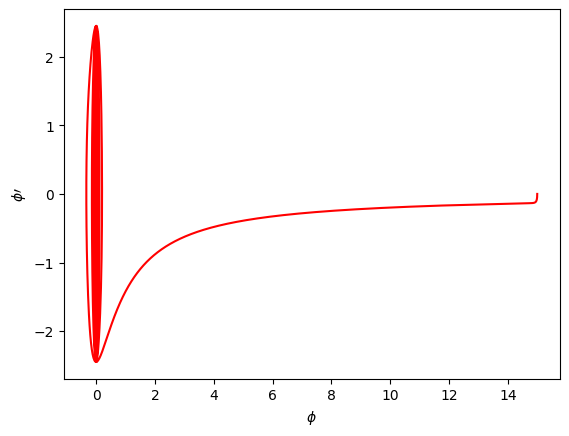

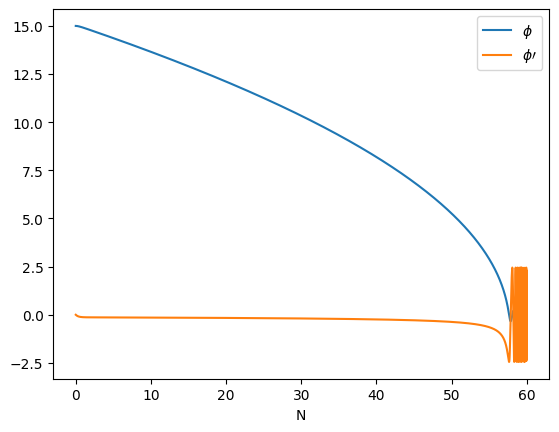

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

m_p = 1 
m = 1e-5 * m_p

xi = 15  # initial field value
yi = 0  # initial field velocity
zi = np.sqrt(yi**2/6*m_p**5 + m**2*xi**2/(6*m_p**4)) # initial value of hubble parameter
ai = 1  # initial value of scale factor

def sys(t, var):#here, t actully is N, to avoid naming trouble later, we will briefly use t here.
    x, y, z, a = var
    dxdN = y
    dydN = -(3 - 0.5 * y**2*m_p**2) * y - m**2 * x / (z**2*m_p**2)
    dzdN = -0.5 * z * y**2*m_p**2
    dadN = a
    return [dxdN, dydN, dzdN, dadN]

N = np.linspace(0, 60, 10000)  # Time points where solution is needed

# invoking the ODE solver
sol = solve_ivp(sys, [N[0], N[-1]], [xi, yi, zi, ai], t_eval=N, rtol=1e-8, atol=1e-10, method='RK45')
t = sol.t
x, y, z, a = sol.y
phi, phi_N, H = x, y, z

plt.plot(phi, phi_N, 'r')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\phi\prime $')
plt.show()

plt.plot(t, phi, label=r'$\phi$')
plt.plot(t, phi_N, label=r'$\phi\prime$')
plt.legend()
plt.xlabel('N')
plt.show()

## slow roll parameters

$\epsilon_H=-\frac{\dot H}{H^2}=\frac{1}{2}\phi\prime^2=1-\frac{a\ddot a }{\dot a^2}$

During the inflationary period, the potential energy dominates, and $\epsilon_H$ is approximately zero. Inflation ends when $a = 0$, at which point $\epsilon = 1$."

$\eta_H=\frac{\ddot \phi}{H\dot\phi}=\epsilon_H+\frac{1}{2\epsilon_H}\frac{d\epsilon_H}{dN}$

It starts small and then oscillates with the subsequent oscillation of $\epsilon$. 

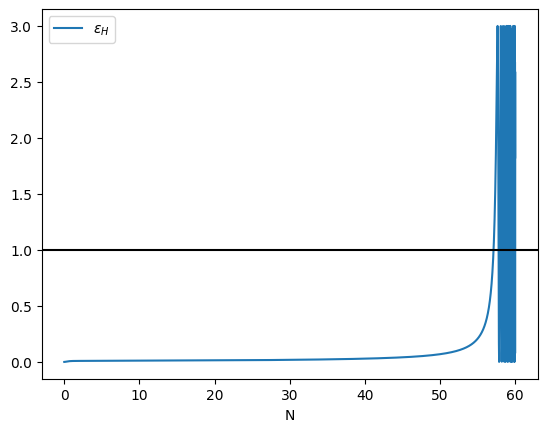

The end of inflation: N= 57.11971197119711


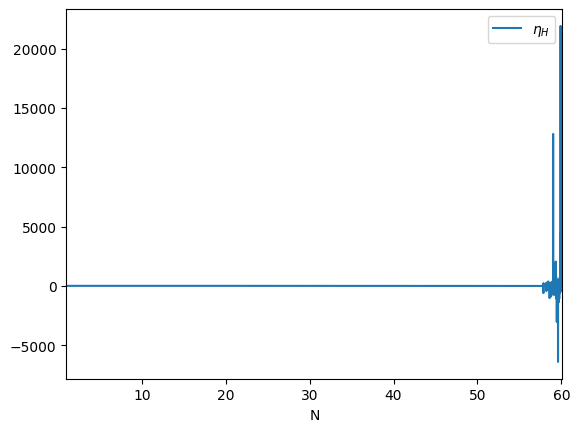

In [38]:
eps=0.5*phi_N**2

plt.plot(N, eps, label=r'$\epsilon_H$')
plt.axhline(1, color='black')
plt.legend()
plt.xlabel('N')
plt.show()

index_of_inflation_end = np.argmin(np.abs(eps - 1)) 
N_value=N[index_of_inflation_end]
print(f'The end of inflation: N= {N_value}')

#To avoid singularities in the function, we exclude points where phi_N = 0, and to prevent strong oscillations following the end of inflation, we only present the results for the three e-folds after the end of inflation."
eta=-3-m**2*phi[1:]/(H[1:]**2*phi_N[1:])
plt.plot(N[1:], eta, label=r'$\eta_H $')
plt.legend()
plt.xlabel('N')
plt.xlim(1, N_value+3)
plt.show()


## Analytical understanding

Let's think analytically. Combine EOM and Friedman equations:

$$\frac{d\dot\phi}{d\phi}=-\frac{\sqrt{\frac{3}{2}}\left(\dot\phi^2+m^2\phi^2\right)^{1/2}\dot\phi+m^2\phi}{\dot\phi}\,,$$

say, Eq.1

*1)  $\dot\phi\gg m^2\phi^2$ 

It describes the situation when the potenial energy is small compared to the kinetic energy. Neglecting $m\phi$ compared to $\dot\phi$ in Eq.1, we obtain
  
$$\frac{d\dot\phi}{d\phi}=-\sqrt{\frac{3}{2}}\dot\phi\,.$$

The solution of this equation is 
        
$$\dot\phi=\dot\phi_0 e^{-\sqrt{\frac{3}{2}}\phi}\,,$$

$$\phi=\text{const}-\sqrt{\frac{2}{3}}\ln t$$
where $\dot\phi_0<0$ is a constant of integration. 

$\dot\phi$ decays exponentially, and regardless of the initial value, it will rapidly meet the attractor. During this process, $\phi$ does not undergo significant changes.

$$\phi\sim lnt\qquad H^2\sim t^{-2}$$

However, in the context of slow-roll inflation, we generally do not consider scenarios with significant kinetic energy at begining.
    
*2)   $\dot\phi\ll m^2\phi^2$, $|\phi|\gg 1$

The afterwards teh solution decribes a stage of accelerated expansion. To determine the attractor solution we assume that $d\dot\phi/d\phi\approx 0$.

Then the Eq.1 becomes:
$$
0=-\frac{\sqrt{\frac{3}{2}}\left(m^2\phi^2\right)^{1/2}\dot\phi+m^2\phi}{\dot\phi}=\sqrt{\frac{3}{2}}+\frac{m}{\dot\phi}\,,
$$


$$\dot\phi\sim-\sqrt{\frac{2}{3}}m\sim const \qquad \phi\sim \sqrt{\frac{2}{3}}m\cdot(t_f-t)\,.$$

During this stage, $\dot\phi$ remains nearly constant while $phi$ continues to decay. Substituting the expression for $phi$ into the Friedmann equation (Neglecting kinetic term)

$$H^2=\left(\frac{\dot a}{a}\right)^2=\frac{1}{3}\left(\frac{1}{2}m^2\phi^2\right)=\frac{1}{3}\left(\frac{1}{2}m^2\frac{2m^2}{3}(t_f-t)^2\right)=\frac{1}{9}m^4(t_f-t)^2\,,$$

$$\Delta N=\frac{1}{4}\phi_i^2\,,$$

where $\phi_i$ is the initial value of field $\phi$. We can estimate the duration of the inflationary phase; for example, with $x = 15$ as set above, this corresponds to more than 50 e-folds. More details see Ref.[1]

*3)Graceful exit

Friedman equation can be written as

$$6H^2\sim \dot\phi^2+m^2\phi^2\,.$$
We define new independent variables
$$\dot\phi\sim H sin\theta \qquad m\phi\sim Hcos\theta\,,$$
where $H$ is Hubble parameter and $\theta$ is angular variable.

It is convenient to replace Eq.1 by a system of two first order differential equations for $H$ and $\theta$.
$$\dot H\sim H^2 sin^2\theta\qquad \dot \theta=-m-\frac{3}{2}Hsin2\theta\,,$$
because $\dot H$ is always negative. H decays continuously, so the second of $\dot\theta$ term can be ignored. Then we obtain

$$\theta\sim -mt$$
where the intergal constant can ve set to zero. Taking $\theta$ into equation $H$

$$\dot H\sim -H^2 sin^2(-mt)$$
$$-\frac{dH}{H^2}\sim sin(mt)dt$$
$$\frac{1}{H}\sim \frac{1}{m}(\frac{mt}{2}-\frac{1}{4}sin2mt)$$
$$H\sim \frac{1}{t}\left(1-\frac{sin(2mt)}{2mt}\right)^{-1}\,.$$
Then, we can obtain equation of $\phi$
$$\phi\sim \frac{Hcos\theta}{m}\sim\frac{cosmt}{mt}\left(1+\frac{sin2mt}{2mt}\right)\,,$$

more detail we discuss in Boltzman equaiton.ipynb.

## In the subsequent sections, we provide additional plotting code to facilitate the examination of variables

In [43]:
# # H and H'
# plt.plot(N, H, label=r'$H$')
# plt.plot(N, -0.5*H*phi_N**2, label=r'$H\prime$')
# plt.legend()
# plt.xlabel('N')
# plt.show()

# #H and H_dot (note, H is different, calculate the first cell first )
# plt.plot(t, H, label=r'$H$')
# plt.plot(t, -0.5*phi_t**2/H**2, label=r'$H\prime$')
# plt.legend()
# plt.xlabel('N')
# plt.show()

## References

[1]Mukhanov, Viatcheslav. Physical foundations of cosmology. Cambridge university press, 2005.

[2]Schmitz, Kai, and Gilles Vertongen. "Reheating and preheating after inflation: an introduction." reh 6 (2010): t2.

[3] Bhatt, S.S., Mishra, S.S., Basak, S. and Sahoo, S.N., 2022. Numerical simulations of inflationary dynamics: slow-roll and beyond. arXiv preprint arXiv:2212.00529.



<!-- @book{Mukhanov:2005sc,
    author = "Mukhanov, V.",
    title = "{Physical Foundations of Cosmology}",
    doi = "10.1017/CBO9780511790553",
    isbn = "978-0-521-56398-7",
    publisher = "Cambridge University Press",
    address = "Oxford",
    year = "2005"
}

@article{schmitz2010reheating,
  title={Reheating and preheating after inflation: an introduction},
  author={Schmitz, Kai and Vertongen, Gilles},
  journal={reh},
  volume={6},
  pages={t2},
  year={2010}
}
@article{bhatt2022numerical,
  title={Numerical simulations of inflationary dynamics: slow-roll and beyond},
  author={Bhatt, Siddharth S and Mishra, Swagat S and Basak, Soumen and Sahoo, Surya N},
  journal={arXiv preprint arXiv:2212.00529},
  year={2022},
  publisher={Dec}
} -->